In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.activations import linear, relu, sigmoid # type: ignore

In [2]:
class Two_hidden_layer_model:

    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2
    
    def fit_and_evaluate(self, X_train, y_train, X_val, y_val, X_test, y_test):

        model = Sequential(
        [
            tf.keras.layers.InputLayer((300,)),
            Dense(self.layer1, activation="relu", name="L1"),
            Dense(self.layer2, activation="relu", name="L2"),
            Dense(5, activation="linear", name="L4"),
        ]
        )
        model.compile(optimizer='adam', loss='mse') 
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)
        train_loss = model.evaluate(X_train, y_train, verbose=0)
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        test_loss = model.evaluate(X_test, y_test, verbose=0)

        return train_loss, val_loss, test_loss   

In [3]:
class Three_hidden_layer_model:

    def __init__(self, layer1, layer2, layer3):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
    
    def fit_and_evaluate(self, X_train, y_train, X_val, y_val, X_test, y_test):

        model = Sequential(
        [
            tf.keras.layers.InputLayer((300,)),
            Dense(self.layer1, activation="relu", name="L1"),
            Dense(self.layer2, activation="relu", name="L2"),
            Dense(self.layer3, activation="relu", name="L3"),
            Dense(5, activation="linear", name="L4"),
        ]
        )
        model.compile(optimizer='adam', loss='mse') 
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)
        train_loss = model.evaluate(X_train, y_train, verbose=0)
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        test_loss = model.evaluate(X_test, y_test, verbose=0)

        return train_loss, val_loss, test_loss 

In [4]:
def plotting(model_units, train_loss, val_loss, test_loss):
    units_layer1 = model_units[:, 0]
    plt.figure(figsize=(8,6))
    plt.plot(units_layer1, train_loss, 'o-', c='blue', label="Training loss")
    plt.plot(units_layer1, val_loss, 'o-', c='green', label="Validation loss")
    plt.plot(units_layer1, test_loss, 'o-', c='red', label="Test loss")
    plt.xlabel("Number of units in layer")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()

In [5]:
data = pd.read_excel("simulated_data1.xlsx")
X = data.iloc[:, :300]
y = data.iloc[:, 300:]
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=0)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)

## **2 Hidden Layer Model**

In [6]:
num_of_units = np.array([[40, 20],
                          [60, 30],
                          [80, 40],
                          [100, 50],
                          [120, 60],
                          [140, 70],
                          [160, 80],
                          [180, 90]])
                          


train_loss = []
val_loss   = []
test_loss  = []

for i in range(len(num_of_units)):
    model = Two_hidden_layer_model(num_of_units[i][0], num_of_units[i][1])
    l1, l2, l3 = model.fit_and_evaluate(X_train, y_train, X_cv, y_cv, X_test, y_test)
    train_loss.append(l1)
    val_loss.append(l2)
    test_loss.append(l3)

train_loss = np.array(train_loss)
val_loss = np.array(val_loss)
test_loss = np.array(test_loss)

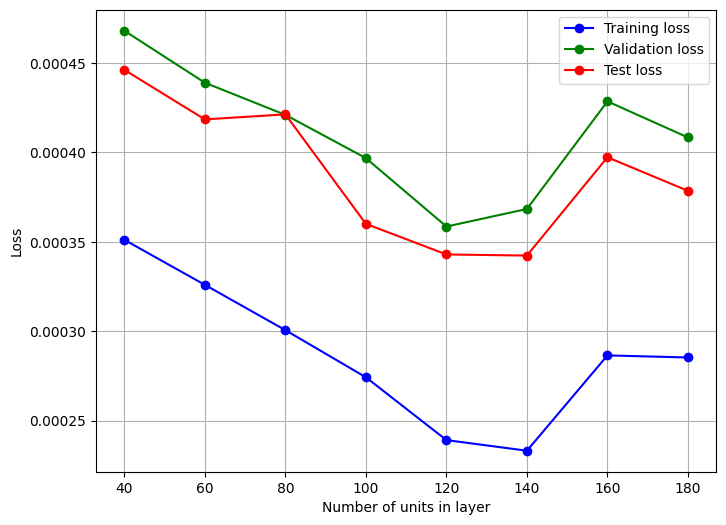

In [7]:
plotting(num_of_units, train_loss, val_loss, test_loss)

### **Best Model**

In [8]:
print("Best model:")
print(f"L1 : {num_of_units[4][0]} units | L2 : {num_of_units[4][1]} units")
print(f"Train loss = {train_loss[4]}")
print(f"Val loss   = {val_loss[4]}")
print(f"Test loss  = {test_loss[4]}")

Best model:
L1 : 120 units | L2 : 60 units
Train loss = 0.00023911155585665256
Val loss   = 0.0003584965015761554
Test loss  = 0.0003428854688536376


In [ ]:
model1 = Sequential(
        [
            tf.keras.layers.InputLayer((300,)),
            Dense(120, activation="relu", name="L1"),
            Dense(60, activation="relu", name="L2"),
            Dense(5, activation="linear", name="L3"),
        ]
        )
model1.compile(optimizer='adam', loss='mse')
model1.summary() -0

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               36120     
                                                                 
 L2 (Dense)                  (None, 60)                7260      
                                                                 
 L3 (Dense)                  (None, 5)                 305       
                                                                 
Total params: 43685 (170.64 KB)
Trainable params: 43685 (170.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **3 Hidden Layer Model**

In [ ]:
num_of_units1 = np.array([[40, 20, 10],
                         [60, 30, 15],
                         [80, 40, 20],
                         [100, 50, 25],
                         [120, 60, 30],
                         [140, 70, 35],
                         [160, 80, 40]])
                          


train_loss1 = []
val_loss1   = []
test_loss1  = []

for i in range(len(num_of_units1)):
    model = Three_hidden_layer_model(num_of_units1[i][0], num_of_units1[i][1], num_of_units1[i][2])
    l1, l2, l3 = model.fit_and_evaluate(X_train, y_train, X_cv, y_cv, X_test, y_test)
    train_loss1.append(l1)
    val_loss1.append(l2)
    test_loss1.append(l3)

train_loss1 = np.array(train_loss1)
val_loss1 = np.array(val_loss1)
test_loss1 = np.array(test_loss1)

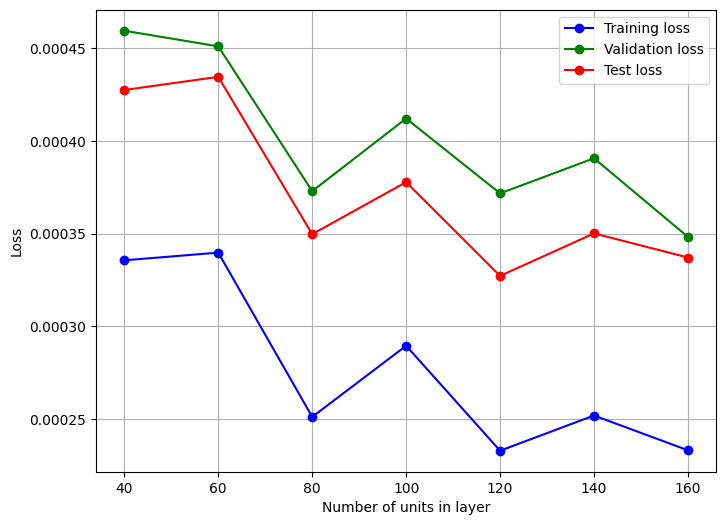

In [11]:
plotting(num_of_units1, train_loss1, val_loss1, test_loss1)

### **Best Model**

In [12]:
print("Best model:")
print(f"L1 : {num_of_units1[2][0]} units | L2 : {num_of_units1[2][1]} units | L3 : {num_of_units1[2][2]} units")
print(f"Train loss = {train_loss1[2]}")
print(f"Val loss   = {val_loss1[2]}")
print(f"Test loss  = {test_loss1[2]}")

Best model:
L1 : 80 units | L2 : 40 units | L3 : 20 units
Train loss = 0.00025121946237049997
Val loss   = 0.0003729242889676243
Test loss  = 0.00034973223228007555


In [13]:
model2 = Sequential(
        [
            tf.keras.layers.InputLayer((300,)),
            Dense(80, activation="relu", name="L1"),
            Dense(40, activation="relu", name="L2"),
            Dense(20, activation="relu", name="L3"),
            Dense(5, activation="linear", name="L4"),
        ]
        )
model2.compile(optimizer='adam', loss='mse')
model2.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 80)                24080     
                                                                 
 L2 (Dense)                  (None, 40)                3240      
                                                                 
 L3 (Dense)                  (None, 20)                820       
                                                                 
 L4 (Dense)                  (None, 5)                 105       
                                                                 
Total params: 28245 (110.33 KB)
Trainable params: 28245 (110.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
